<a href="https://colab.research.google.com/github/IrinaKrivichenko/Kaggle-competition-PetFinder.my-Adoption-Prediction/blob/master/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu


import tensorflow as tf
tf.enable_eager_execution()
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.optimizers import Adam



    100% |████████████████████████████████| 345.2MB 54kB/s 


https://github.com/sozykin/dlpython_course/blob/master/computer_vision/cats_and_dogs/cats_and_dogs_vgg16.ipynb


In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

#lists the content of your google drive
!ls "/content/drive/My Drive/"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
'Colab Notebooks'
 Frank_10_shagov_k_otlichnyim_otsenkam_678eb9_414482.txt.gdoc
'песни и стихи'
 стажировка
 Триггер.txt.gdoc


In [ ]:

from shutil import unpack_archive
unpack_archive('content/drive/My Drive/Colab Notebooks/test_images.zip', '/content/')
print('test data is ready')

from shutil import unpack_archive
unpack_archive('/content/drive/My Drive/Colab Notebooks/train_images.zip', '/content/')
print('train data is ready')


ReadError: ignored

In [ ]:
from tensorflow.python.keras.applications import VGG19

# Размерность тензора на основе изображения для входных данных в нейронную сеть
img_width, img_height = 256, 256
#Загружаем предварительно обученную нейронную сеть
vgg19_net = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
#"Замораживаем" веса предварительно обученной нейронной сети VGG19
vgg19_net.trainable = False
vgg19_net.summary()

#Создаем составную нейронную сеть на основе VGG19¶
modelv = Sequential()
# Добавляем в модель сеть VGG19 вместо слоя
modelv.add(vgg19_net)
modelv.add(Flatten())
modelv.add(Dense(256))
modelv.add(Activation('relu'))
modelv.add(Dropout(0.5))
modelv.add(Dense(5))
modelv.add(Activation('softmax'))

modelv.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=1e-5), 
              metrics=['categorical_accuracy'])


modelv.summary()


Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 4s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_____

https://www.youtube.com/watch?v=oDHpqu52soI


In [ ]:
from keras.layers import Layer
from tensorflow.python.keras.applications import ResNet50

# Размерность тензора на основе изображения для входных данных в нейронную сеть
img_width, img_height = 256, 256
#Загружаем предварительно обученную нейронную сеть
rNet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
#"Замораживаем" веса предварительно обученной нейронной сети ResNet50
rNet50.trainable = False
rNet50.summary()

#Создаем составную нейронную сеть на основе ResNet50¶
modelr = Sequential()
# Добавляем в модель сеть rNet50 вместо слоя
modelr.add(rNet50)
modelr.add(Flatten())
modelr.add(Dense(256))
modelr.add(Activation('relu'))
modelr.add(Dropout(0.5))
modelr.add(Dense(5))
modelr.add(Activation('softmax'))

modelr.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=1e-5), 
              metrics=['categorical_accuracy'])
modelr.summary()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 128, 128, 64) 256         conv1[0][0]                      
____________________________________________

In [ ]:
rNet50.summary()
modelr.summary()

In [ ]:
img_size = 256
# Каталог с данными для обучения
train_dir = 'train'
# Каталог с данными для проверки
val_dir = 'val'
# Каталог с данными для тестирования
test_dir = 'test'
# backend Tensorflow, channels_last
input_shape = (img_size, img_size, 3)
# Размер мини-выборки
batch_size = 90
# Количество изображений для обучения
nb_train_samples = 49992  
# Количество изображений для проверки
nb_validation_samples = 5990 
# Количество изображений для тестирования
nb_test_samples = 5960 


datagen = ImageDataGenerator(rescale=1. / 255)


#Генератор данных для обучения на основе изображений из каталога
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')


#Генератор данных для проверки на основе изображений из каталога
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')

#Генератор данных для тестирования на основе изображений из каталога
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')


Found 49992 images belonging to 5 classes.
Found 5990 images belonging to 5 classes.
Found 5960 images belonging to 5 classes.


In [ ]:

#Обучаем модель с использованием генераторов

modelr.fit_generator(train_generator, steps_per_epoch=nb_train_samples // batch_size, validation_data=val_generator, validation_steps=nb_validation_samples // batch_size, 
                     epochs=2)
#Оцениваем качество работы сети с помощью генератора
scores = modelr.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность r на тестовых данных: %.2f%%" % (scores[1]*100))

#Оцениваем качество работы сети с помощью генератора
scores = modelr.evaluate_generator(val_generator, nb_validation_samples // batch_size)
print("Аккуратность r на val данных после переноса обучения: %.2f%%" % (scores[1]*100))

if scores[1] < 0.31 :
  modelr.fit_generator(train_generator, steps_per_epoch=nb_train_samples // batch_size, validation_data=val_generator, validation_steps=nb_validation_samples // batch_size, 
                     epochs=1)


#Обучаем модель с использованием генераторов

modelv.fit_generator(train_generator, steps_per_epoch=nb_train_samples // batch_size, validation_data=val_generator, validation_steps=nb_validation_samples // batch_size, 
                     epochs=6)

#Оцениваем качество работы сети с помощью генератора
scores = modelv.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность v на тестовых данных: %.2f%%" % (scores[1]*100))

#Оцениваем качество работы сети с помощью генератора
scores = modelv.evaluate_generator(val_generator, nb_validation_samples // batch_size)
print("Аккуратность v на val данных после переноса обучения: %.2f%%" % (scores[1]*100))


Instructions for updating:
Use tf.cast instead.
Epoch 1/2
625/625 [==============================] - 556s 890ms/step - loss: 1.6503 - categorical_accuracy: 0.2704 - val_loss: 1.5440 - val_categorical_accuracy: 0.2569
Epoch 2/2
625/625 [==============================] - 544s 871ms/step - loss: 1.4171 - categorical_accuracy: 0.3643 - val_loss: 1.4972 - val_categorical_accuracy: 0.3154
Аккуратность r на тестовых данных: 30.44%
Аккуратность r на val данных после переноса обучения: 31.54%
Epoch 1/6
625/625 [==============================] - 781s 1s/step - loss: 1.5764 - categorical_accuracy: 0.2577 - val_loss: 1.5110 - val_categorical_accuracy: 0.2908
Epoch 2/6
625/625 [==============================] - 762s 1s/step - loss: 1.5318 - categorical_accuracy: 0.2853 - val_loss: 1.5125 - val_categorical_accuracy: 0.2913
Epoch 3/6
625/625 [==============================] - 761s 1s/step - loss: 1.5128 - categorical_accuracy: 0.3007 - val_loss: 1.4974 - val_categorical_accuracy: 0.2843
Epoch 4/6
625

In [ ]:
#Оцениваем качество работы сети с помощью генератора
scores = modelr.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность r на тестовых данных: %.2f%%" % (scores[1]*100))

#Оцениваем качество работы сети с помощью генератора
scores = modelr.evaluate_generator(val_generator, nb_validation_samples // batch_size)
print("Аккуратность r на val данных после переноса обучения: %.2f%%" % (scores[1]*100))

#Оцениваем качество работы сети с помощью генератора
scores = modelv.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность v на тестовых данных: %.2f%%" % (scores[1]*100))

#Оцениваем качество работы сети с помощью генератора
scores = modelv.evaluate_generator(val_generator, nb_validation_samples // batch_size)
print("Аккуратность v на val данных после переноса обучения: %.2f%%" % (scores[1]*100))

Аккуратность r на тестовых данных: 32.15%
Аккуратность r на val данных после переноса обучения: 32.24%
Аккуратность v на тестовых данных: 29.87%
Аккуратность v на val данных после переноса обучения: 29.82%


In [ ]:
#Оцениваем качество работы сети с помощью генератора
#scores = modelr.evaluate_generator(val_generator, nb_test_samples // batch_size)
#print("Аккуратность на val данных после переноса обучения: %.2f%%" % (scores[1]*100))


path="drive/My Drive/Colab Notebooks/"
model_name = path+"RsNt50_a_"+str(scores[1])

model_json = modelr.to_json()
json_file = open(model_name+".json", "w")
json_file.write(model_json)
json_file.close()
modelr.save_weights(model_name+"_w.h5")
'''
from google.colab import files
files.download(model_name+".json")
files.download(model_name+"_w.h5")

#Оцениваем качество работы сети с помощью генератора
scores = modelv.evaluate_generator(val_generator, nb_validation_samples // batch_size)
#print("Аккуратность на val данных после переноса обучения: %.2f%%" % (scores[1]*100))


path="content/drive/My Drive/Colab Notebooks/"
model_name = "vgg_3_"+str(scores[1])

model_json = modelv.to_json()
json_file = open(model_name+".json", "w")
json_file.write(model_json)
json_file.close()
modelv.save_weights(model_name+"_w.h5")

from google.colab import files
files.download(model_name+".json")
files.download(model_name+"_w.h5")'''

'\nfrom google.colab import files\nfiles.download(model_name+".json")\nfiles.download(model_name+"_w.h5")\n\n#Оцениваем качество работы сети с помощью генератора\nscores = modelv.evaluate_generator(val_generator, nb_validation_samples // batch_size)\n#print("Аккуратность на val данных после переноса обучения: %.2f%%" % (scores[1]*100))\n\n\npath="content/drive/My Drive/Colab Notebooks/"\nmodel_name = "vgg_3_"+str(scores[1])\n\nmodel_json = modelv.to_json()\njson_file = open(model_name+".json", "w")\njson_file.write(model_json)\njson_file.close()\nmodelv.save_weights(model_name+"_w.h5")\n\nfrom google.colab import files\nfiles.download(model_name+".json")\nfiles.download(model_name+"_w.h5")'

In [ ]:
from tensorflow.python.keras.models import model_from_json

path="drive/My Drive/Colab Notebooks/"
model_name = path+"RsNt50_b_0.29348916"

json_file = open(model_name+".json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights(model_name+"_w.h5")


for layer in model.layers:
    if layer.name == 'resnet50':
        rNet50 = layer
        
vgg19_net = rNet50
modelv = model
modelv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33554688  
_________________________________________________________________
activation_51 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1285      
_________________________________________________________________
activation_52 (Activation)   (None, 5)                 0         
Total para

In [ ]:

#Обучаем модель с использованием генераторов
print("r перенос обучения")
modelr.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=2,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)


#Оцениваем качество работы сети с помощью генератора
scores = modelr.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность после переноса обучения: %.2f%%" % (scores[1]*100))

if scores[1] < 0.3 :
  modelr.fit_generator(train_generator, steps_per_epoch=nb_train_samples // batch_size, validation_data=val_generator, validation_steps=nb_validation_samples // batch_size, 
                     epochs=1)
  scores = modelr.evaluate_generator(test_generator, nb_test_samples // batch_size)
  print("Аккуратность после переноса обучения: %.2f%%" % (scores[1]*100))                  

path="drive/My Drive/Colab Notebooks/"
model_name = path+ "RsNt50_b_"+str(scores[1])


model_json = modelr.to_json()
json_file = open(model_name+".json", "w")
json_file.write(model_json)
json_file.close()
modelr.save_weights(model_name+"_w.h5")


#modelr = model
rNet50.trainable = True
trainable = False
for layer in rNet50.layers:
    if layer.name == 'res5a_branch2a':
        trainable = True
    layer.trainable = trainable
    
modelr.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=1e-5), 
              metrics=['categorical_accuracy'])
              
print("r настройка")
modelr.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=2,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)
           

#Оцениваем качество работы сети с помощью генератора
scores = modelr.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность после тонкой настройки : %.2f%%" % (scores[1]*100))

if scores[1] < 0.32 :
  modelr.fit_generator(train_generator, steps_per_epoch=nb_train_samples // batch_size, validation_data=val_generator, validation_steps=nb_validation_samples // batch_size, 
                     epochs=1)
  scores = modelr.evaluate_generator(test_generator, nb_test_samples // batch_size)
  print("Аккуратность после переноса обучения: %.2f%%" % (scores[1]*100))                  


path="drive/My Drive/Colab Notebooks/"
model_name = path+ "RsNt50_c_last_"+str(scores[1])

model_json = modelr.to_json()
json_file = open(model_name+".json", "w")
json_file.write(model_json)
json_file.close()
modelr.save_weights(model_name+"_w.h5")







#Обучаем модель с использованием генераторов
print("v перенос обучения")
modelv.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs= 4,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)


#Оцениваем качество работы сети с помощью генератора
scores = modelv.evaluate_generator(test_generator, nb_test_samples // batch_size)


if scores[1] < 0.30 :
  modelv.fit_generator(train_generator, steps_per_epoch=nb_train_samples // batch_size, validation_data=val_generator, validation_steps=nb_validation_samples // batch_size, 
                     epochs=1)
  scores = modelv.evaluate_generator(test_generator, nb_test_samples // batch_size)

print("Аккуратность после переноса обучения: %.2f%%" % (scores[1]*100))

path="drive/My Drive/Colab Notebooks/"
model_name = path+"VGG19_a_"+str(scores[1])


model_json = modelv.to_json()
json_file = open(model_name+".json", "w")
json_file.write(model_json)
json_file.close()
modelv.save_weights(model_name+"_w.h5")


vgg19_net.trainable = True
trainable = False
for layer in vgg19_net.layers:
    if layer.name == 'block5_conv1':
        trainable = True
    layer.trainable = trainable
    
modelv.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=1e-5), 
              metrics=['categorical_accuracy'])
print("v настройка")
modelv.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=2,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

#Оцениваем качество работы сети с помощью генератора
scores = modelv.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность после тонкой настройки : %.2f%%" % (scores[1]*100))

if scores[1] < 0.32 :
  modelr.fit_generator(train_generator, steps_per_epoch=nb_train_samples // batch_size, validation_data=val_generator, validation_steps=nb_validation_samples // batch_size, 
                     epochs=1)
  scores = modelr.evaluate_generator(test_generator, nb_test_samples // batch_size)
  print("Аккуратность после тонкой настройки : %.2f%%" % (scores[1]*100))                  


path="drive/My Drive/Colab Notebooks/"
model_name = path+"RsNt50_b_last_"+str(scores[1])

model_json = modelv.to_json()
json_file = open(model_name+".json", "w")
json_file.write(model_json)
json_file.close()
modelv.save_weights(model_name+"_w.h5")

from google.colab import files
files.download(model_name+".json")
files.download(model_name+"_w.h5")

r перенос обучения
Epoch 1/2
625/625 [==============================] - 532s 851ms/step - loss: 1.5875 - categorical_accuracy: 0.2766 - val_loss: 1.5234 - val_categorical_accuracy: 0.2735
Epoch 2/2
625/625 [==============================] - 527s 843ms/step - loss: 1.4076 - categorical_accuracy: 0.3703 - val_loss: 1.5056 - val_categorical_accuracy: 0.2920
Аккуратность после переноса обучения: 29.50%
625/625 [==============================] - 527s 843ms/step - loss: 1.2248 - categorical_accuracy: 0.4789 - val_loss: 1.5231 - val_categorical_accuracy: 0.3139
Аккуратность после переноса обучения: 31.09%
r настройка
Epoch 1/2
625/625 [==============================] - 637s 1s/step - loss: 1.0220 - categorical_accuracy: 0.5872 - val_loss: 1.5518 - val_categorical_accuracy: 0.3162
Epoch 2/2
625/625 [==============================] - 630s 1s/step - loss: 0.7838 - categorical_accuracy: 0.7066 - val_loss: 1.6069 - val_categorical_accuracy: 0.3090
Аккуратность после тонкой настройки : 31.73%
625/6

KeyboardInterrupt: ignored

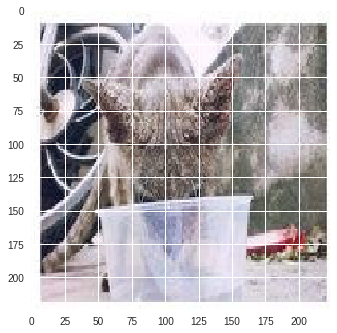

[[0.06108019 0.13073164 0.24103832 0.31544468 0.2517052 ]]
3


In [ ]:
from tensorflow.python.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

img_width = 224
img_height = 224
img = load_img("01.jpg", target_size=(img_width, img_height))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x,axis = 0)
pred = model.predict(x)
print(pred)
pred = np.argmax(pred)
print(pred)

In [ ]:

from tensorflow.python.keras.models import model_from_json

models_acc = [ 0.3145973, 0.31602672, 0.3161074, 0.3166945, 
    0.32063758, 0.32147652, 0.3248748, 0.32785234, 0.32583892]

path="drive/My Drive/Colab Notebooks/"

models=[]
i=0
for x in models_acc:
  model_name = path+"m_"+ str(x)

  json_file = open(model_name+".json", "r")
  model_json = json_file.read()
  json_file.close()
  model = model_from_json(model_json)
  model.load_weights(model_name+"_w.h5")
  model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=1e-5), 
              metrics=['categorical_accuracy'])
  print("Аккуратность модели "+ str(x) )
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
  print(": %.2f%%" % (scores[1]*100))  
  models.append(model)
  
from tensorflow.python.keras.preprocessing import image
import numpy as np

filenames = ["01.jpg","02.jpg","03.jpg","04.jpg","05.jpg"]
batch_images = np.zeros((5,img_size,img_size,3))

'''
for filename in filenames:  
    try:
        batch_images[i] = load_image("../input/train_images/", filename)
    except:
        pass
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x,axis = 0)
for x in models_acc:
  pred = model.predict(x)
  print(pred)
  pred = np.argmax(pred)
  print(pred)

'''

Аккуратность модели 0.3145973


ValueError: ignored